<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_OneQ9_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [7]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    tokenizer = Tokenizer(num_words=dim)
    data_one_hot = tokenizer.sequences_to_matrix(data, mode='binary')
    return data_one_hot

# 텍스트 데이터의 원-핫 인코딩
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터의 범주형 형태로 변환
num_classes = max(train_labels) + 1
y_train = to_categorical(train_labels, num_classes=num_classes)
y_val = to_categorical(val_labels, num_classes=num_classes)
y_test = to_categorical(test_labels, num_classes=num_classes)

In [20]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # 50%의 Dropout 적용
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # 50%의 Dropout 적용
model.add(Dense(46, activation='softmax'))  # 클래스 수에 맞는 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640064    
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [21]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 함수: 검증 손실이 개선되면 모델을 저장
checkpoint_callback = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# EarlyStopping 콜백 함수: 검증 손실이 더 이상 개선되지 않으면 학습 조기 종료
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,  # 3번의 epoch 동안 개선이 없으면 학습 조기 종료
    restore_best_weights=True,
    verbose=1
)

# 모델 훈련
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/30
13/14 [==========================>...] - ETA: 0s - loss: 3.8277 - accuracy: 0.1681
Epoch 1: val_loss improved from inf to 3.53754, saving model to best_model.h5
14/14 [==============================] - 3s 80ms/step - loss: 3.8187 - accuracy: 0.1703 - val_loss: 3.5375 - val_accuracy: 0.5374
Epoch 2/30
 4/14 [=======>......................] - ETA: 0s - loss: 2.7366 - accuracy: 0.4048

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/14 [==========================>...] - ETA: 0s - loss: 2.4783 - accuracy: 0.4733
Epoch 2: val_loss improved from 3.53754 to 3.14515, saving model to best_model.h5
14/14 [==============================] - 1s 40ms/step - loss: 2.4762 - accuracy: 0.4731 - val_loss: 3.1451 - val_accuracy: 0.6523
Epoch 3/30
13/14 [==========================>...] - ETA: 0s - loss: 1.8973 - accuracy: 0.6161
Epoch 3: val_loss improved from 3.14515 to 2.80035, saving model to best_model.h5
14/14 [==============================] - 1s 46ms/step - loss: 1.8956 - accuracy: 0.6164 - val_loss: 2.8003 - val_accuracy: 0.6701
Epoch 4/30
14/14 [==============================] - ETA: 0s - loss: 1.5701 - accuracy: 0.6756
Epoch 4: val_loss improved from 2.80035 to 2.51998, saving model to best_model.h5
14/14 [==============================] - 1s 56ms/step - loss: 1.5701 - accuracy: 0.6756 - val_loss: 2.5200 - val_accuracy: 0.6857
Epoch 5/30
11/14 [======================>.......] - ETA: 0s - loss: 1.3755 - accuracy: 0.7115

<ipython-input-22-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


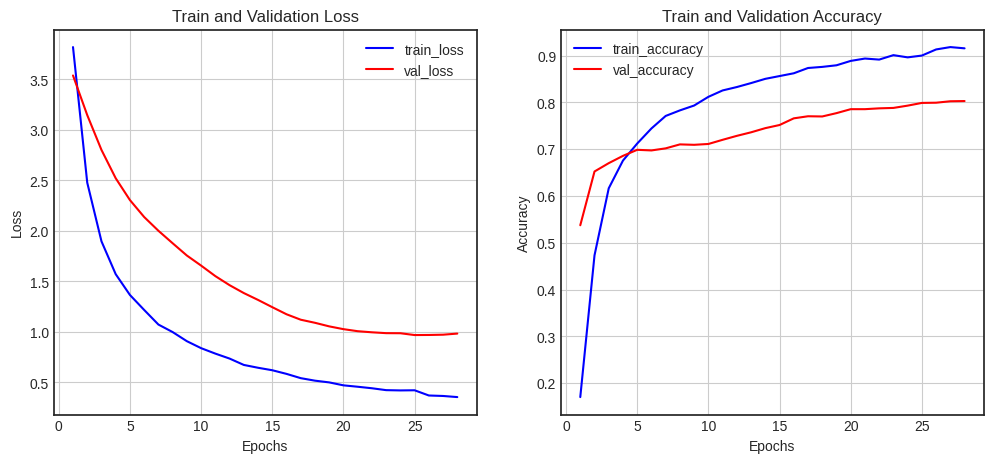

In [22]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [23]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0705 - accuracy: 0.7778
